In [1]:
import tensorflow.keras as tk
mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


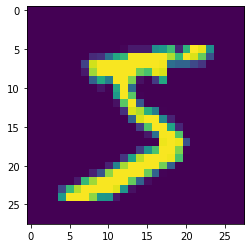

The number is supposed to be:  5


In [4]:
import matplotlib.pyplot as plt
# A training image
plt.imshow(x_train[0]) 
plt.show()
# What the number is supposed to be
print("The number is supposed to be: ", y_train[0]) 

In [5]:
# Reshape the data: 28 x 28 size images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Normalize the pixel values from a scale out of 255 to a scale out of 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [6]:
from tensorflow.keras.utils import to_categorical
# We convert the y values (numbers) into ones and zeros, making each number categorical. This is called one-hot encoding. 
print(y_train[0])
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# Set the CNN model
import keras
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                              input_shape=input_shape))
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
# After the CNN there is a FNN
model.add(keras.layers.Dense(128, activation='relu'))
# Using Dropout to prevent overfitting & support regularization.
model.add(keras.layers.Dropout(0.5))
# The output layer of the FNN is one of 10 classes
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adadelta',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 2.2295 - accuracy: 0.2629 - val_loss: 2.1843 - val_accuracy: 0.5844
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 2.1631 - accuracy: 0.3713 - val_loss: 2.1017 - val_accuracy: 0.6631
Epoch 3/20
469/469 [==============================] - 7s 16ms/step - loss: 2.0783 - accuracy: 0.4495 - val_loss: 1.9904 - val_accuracy: 0.7014
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 1.9626 - accuracy: 0.5128 - val_loss: 1.8445 - val_accuracy: 0.7277
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 1.8189 - accuracy: 0.5574 - val_loss: 1.6664 - val_accuracy: 0.7457
Epoch 6/20
469/469 [==============================] - 7s 15ms/step - loss: 1.6516 - accuracy: 0.5904 - val_loss: 1.4655 - val_accuracy: 0.7670
Epoch 7/20
469/469 [==============================] - 7s 15ms/step - loss: 1.4863 - accuracy: 0.6162 - val_loss: 1.2664 - val_accuracy: 0.7842

In [11]:
# Will print the losss and the accuracy values
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.4754 - accuracy: 0.8747
[0.4753541052341461, 0.8747000098228455]
